In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import io
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset.csv',parse_dates=['pickup_datetime','dropoff_datetime'], date_parser=dateparse)
dataset.shape

(1048575, 18)

In [0]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
dataset.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000345001,DST000401,NO,NaN,1.4,NaN,2015-04-20 04:18:00,2015-04-20 04:24:00,1.0,-74.003939,40.742894,1.0,N,-73.993369,40.734247,CRD,0.5,8.4
1,AIX000345002,DST000401,NO,NaN,1.0,NaN,2015-04-19 18:16:00,2015-04-19 18:22:00,3.0,-73.973864,40.752194,1.0,N,-73.958701,40.772533,CRD,0.0,8.5
2,AIX000345003,DST000401,NO,NaN,0.0,NaN,2015-04-06 08:04:00,2015-04-06 08:10:00,2.0,-73.954406,40.764420,1.0,N,-73.970780,40.758350,CSH,0.0,7.0
3,AIX000345004,DST000532,NO,NaN,1.8,NaN,2015-04-10 09:48:00,2015-04-10 10:00:00,2.0,-73.962345,40.767215,1.0,NaN,-73.975512,40.756867,CRD,0.0,11.3
4,AIX000345005,DST000401,NO,NaN,0.0,NaN,2015-04-15 13:12:00,2015-04-15 13:26:00,1.0,-74.004657,40.707434,1.0,N,-73.999369,40.721517,CSH,0.0,10.0


In [0]:
dataset.columns

Index(['TID', 'vendor_id', 'new_user', 'tolls_amount', 'tip_amount', 'mta_tax',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'surcharge', 'fare_amount'],
      dtype='object')

In [0]:
len(dataset['TID'].unique())

1048575

In [0]:
dataset=dataset.drop(['TID'],axis=1)

In [0]:
len(dataset['vendor_id'].unique())

2

In [0]:
dataset=dataset.rename(columns={'vendor_id':'vendors'})

In [0]:
dataset['rate_code'].value_counts()

1.0      1023614
2.0        19812
5.0         3041
3.0         1656
4.0          337
0.0           46
6.0           15
210.0          2
Name: rate_code, dtype: int64

In [0]:
dataset.new_user.unique()

array(['NO'], dtype=object)

In [0]:
dataset=dataset.drop(['new_user'],axis=1)

In [0]:
(dataset[dataset['tolls_amount']==0].shape[0]/dataset.shape[0])*100

95.14455332236606

In [0]:
dataset=dataset.drop(['tolls_amount'],axis=1)

In [0]:
(dataset['store_and_fwd_flag'].isnull().sum()/dataset['store_and_fwd_flag'].isnull().count())*100

53.537801301766685

In [0]:
dataset=dataset.drop(['store_and_fwd_flag'],axis=1)

In [0]:
dataset=dataset[dataset['dropoff_datetime']>=dataset['pickup_datetime']]
dataset=dataset[(dataset['pickup_latitude']!=dataset['dropoff_latitude']) & (dataset['pickup_longitude']!=dataset['dropoff_longitude'])]

In [0]:
dataset['travel_seconds']=(dataset['dropoff_datetime']-dataset['pickup_datetime']).dt.total_seconds()

In [0]:
import geopy.distance

dataset['travel_kms']=dataset[dataset.pickup_latitude.notnull() & dataset.pickup_longitude.notnull()  & dataset.dropoff_latitude.notnull()  & dataset.dropoff_longitude.notnull()].apply(
(lambda row: geopy.distance.vincenty(
        (row['pickup_latitude'], row['pickup_longitude']),
        (row['dropoff_latitude'], row['dropoff_longitude'])
    ).km),
    axis=1
)

In [0]:
dataset['hour']=dataset.pickup_datetime.apply(lambda x: x.hour)

In [0]:
dataset['is_weekend']=dataset['pickup_datetime'].apply(lambda x: 0 if x.weekday() <= 4 else 1)

In [0]:
dataset.head()

,vendors,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,travel_seconds,travel_kms,hour,is_weekend
0,DST000401,1.4,NaN,2015-04-20 04:18:00,2015-04-20 04:24:00,1.0,-74.003939,40.742894,1.0,-73.993369,40.734247,CRD,0.5,8.4,360.0,1.311173,4,0
1,DST000401,1.0,NaN,2015-04-19 18:16:00,2015-04-19 18:22:00,3.0,-73.973864,40.752194,1.0,-73.958701,40.772533,CRD,0.0,8.5,360.0,2.596270,18,1
2,DST000401,0.0,NaN,2015-04-06 08:04:00,2015-04-06 08:10:00,2.0,-73.954406,40.764420,1.0,-73.970780,40.758350,CSH,0.0,7.0,360.0,1.538152,8,0
3,DST000532,1.8,NaN,2015-04-10 09:48:00,2015-04-10 10:00:00,2.0,-73.962345,40.767215,1.0,-73.975512,40.756867,CRD,0.0,11.3,720.0,1.598931,9,0
4,DST000401,0.0,NaN,2015-04-15 13:12:00,2015-04-15 13:26:00,1.0,-74.004657,40.707434,1.0,-73.999369,40.721517,CSH,0.0,10.0,840.0,1.626473,13,0


In [0]:
revised_dataset=dataset.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','dropoff_datetime','pickup_datetime'],axis=1)

In [0]:
import numpy as np

In [0]:
revised_dataset['passenger_count'].isnull().sum()

164

In [0]:
revised_dataset['passenger_count']=revised_dataset['passenger_count'].fillna(revised_dataset['passenger_count'].mode()[0])
revised_dataset['passenger_count']=revised_dataset['passenger_count'].astype('int')

In [0]:
revised_dataset['payment_type'].isnull().sum()

118

In [0]:
revised_dataset['payment_type']=revised_dataset['payment_type'].astype('str')
revised_dataset['payment_type']=revised_dataset['payment_type'].replace('nan','UNK')
revised_dataset['payment_type']=revised_dataset['payment_type'].replace('UNK',revised_dataset['payment_type'].mode()[0])
revised_dataset['payment_type'].unique()

array(['CRD', 'CSH', 'DIS', 'NOC'], dtype=object)

In [0]:
revised_dataset['rate_code'].isnull().sum()

46

In [0]:
revised_dataset['rate_code']=revised_dataset['rate_code'].fillna(revised_dataset['rate_code'].mode()[0])
revised_dataset['rate_code'].isnull().sum()
revised_dataset['rate_code']=revised_dataset['rate_code'].astype('int')
revised_dataset['rate_code']=revised_dataset['rate_code'].replace(210,7)
revised_dataset['rate_code'].unique()

array([1, 2, 4, 5, 3, 0, 6, 7])

In [0]:
revised_dataset['tip_amount'].isnull().sum()

102216

In [0]:
revised_dataset['tip_amount']=revised_dataset['tip_amount'].fillna(0)

In [0]:
revised_dataset['payment_type']=revised_dataset['payment_type'].astype('category')
revised_dataset['rate_code']=revised_dataset['rate_code'].astype('category')
revised_dataset['vendors']=revised_dataset['vendors'].astype('category')
revised_dataset['hour']=revised_dataset['hour'].astype('category')
revised_dataset['is_weekend']=revised_dataset['is_weekend'].astype('category')

In [0]:
for i in revised_dataset.columns:
    if type(revised_dataset[i][0])==np.float64:
        revised_dataset[i]=revised_dataset[i].fillna(revised_dataset[i].mean())

In [0]:
revised_dataset.isnull().sum()

vendors            0
tip_amount         0
mta_tax            0
passenger_count    0
rate_code          0
payment_type       0
surcharge          0
fare_amount        0
travel_seconds     0
travel_kms         0
hour               0
is_weekend         0
dtype: int64

In [0]:
revised_dataset.head()

,vendors,tip_amount,mta_tax,passenger_count,rate_code,payment_type,surcharge,fare_amount,travel_seconds,travel_kms,hour,is_weekend
0,DST000401,1.4,0.498461,1,1,CRD,0.5,8.4,360.0,1.311173,4,0
1,DST000401,1.0,0.498461,3,1,CRD,0.0,8.5,360.0,2.596270,18,1
2,DST000401,0.0,0.498461,2,1,CSH,0.0,7.0,360.0,1.538152,8,0
3,DST000532,1.8,0.498461,2,1,CRD,0.0,11.3,720.0,1.598931,9,0
4,DST000401,0.0,0.498461,1,1,CSH,0.0,10.0,840.0,1.626473,13,0


In [0]:
revised_dataset.describe()

,tip_amount,mta_tax,passenger_count,surcharge,fare_amount,travel_seconds,travel_kms
count,1.022737e+06,1.022737e+06,1.022737e+06,1.022737e+06,1.022737e+06,1.022737e+06,1.022737e+06
mean,1.353696e+00,4.984613e-01,1.721259e+00,3.195168e-01,1.519269e+01,7.959504e+02,3.470281e+01
std,2.223237e+00,2.769283e-02,1.382938e+00,3.502397e-01,1.244880e+01,6.077046e+02,5.043047e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,1.389743e-04
25%,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,8.000000e+00,3.600000e+02,1.339009e+00
50%,7.500000e-01,5.000000e-01,1.000000e+00,3.195168e-01,1.140000e+01,6.600000e+02,2.344678e+00
75%,2.000000e+00,5.000000e-01,2.000000e+00,5.000000e-01,1.700000e+01,1.020000e+03,4.658837e+00
max,2.000000e+02,5.000000e-01,9.000000e+00,2.500000e+00,4.875000e+02,4.650000e+04,1.451410e+04


In [0]:
revised_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022737 entries, 0 to 1048574
Data columns (total 12 columns):
vendors            1022737 non-null category
tip_amount         1022737 non-null float64
mta_tax            1022737 non-null float64
passenger_count    1022737 non-null int64
rate_code          1022737 non-null category
payment_type       1022737 non-null category
surcharge          1022737 non-null float64
fare_amount        1022737 non-null float64
travel_seconds     1022737 non-null float64
travel_kms         1022737 non-null float64
hour               1022737 non-null category
is_weekend         1022737 non-null category
dtypes: category(5), float64(6), int64(1)
memory usage: 107.3 MB


In [0]:
revised_dataset.corr()

,tip_amount,mta_tax,passenger_count,surcharge,fare_amount,travel_seconds,travel_kms
tip_amount,1.000000,-0.148205,-0.006896,-0.017410,0.627871,0.413405,0.009654
mta_tax,-0.148205,1.000000,0.008640,0.033567,-0.294166,-0.072841,-0.034971
passenger_count,-0.006896,0.008640,1.000000,0.008663,0.010326,0.015613,-0.006261
surcharge,-0.017410,0.033567,0.008663,1.000000,-0.042363,-0.061876,-0.002742
fare_amount,0.627871,-0.294166,0.010326,-0.042363,1.000000,0.801305,0.026419
travel_seconds,0.413405,-0.072841,0.015613,-0.061876,0.801305,1.000000,-0.017156
travel_kms,0.009654,-0.034971,-0.006261,-0.002742,0.026419,-0.017156,1.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

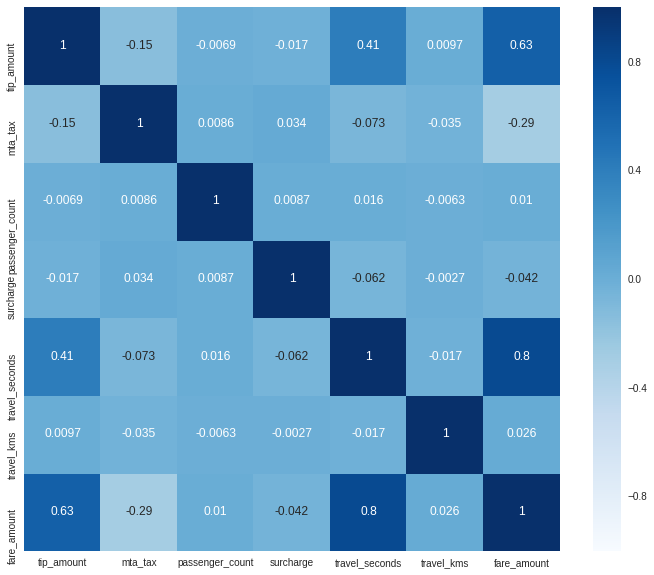

In [0]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(revised_dataset[['vendors', 'tip_amount', 'mta_tax', 'passenger_count', 'rate_code',
       'payment_type', 'surcharge', 'travel_seconds',
       'travel_kms', 'hour', 'is_weekend', 'fare_amount']].corr(),annot=True, cmap='Blues')

In [0]:
continuous_variables=[]
for i in range(len(revised_dataset.corr().fare_amount)):
    if revised_dataset.corr().fare_amount[i]>2/np.sqrt(revised_dataset.shape[0]):
        continuous_variables.append(revised_dataset.corr().index[i])
categorical_variables=['vendors','payment_type','rate_code','hour','is_weekend']
selected_variables=continuous_variables+categorical_variables
selected_variables

['tip_amount',
 'passenger_count',
 'fare_amount',
 'travel_seconds',
 'travel_kms',
 'vendors',
 'payment_type',
 'rate_code',
 'hour',
 'is_weekend']

In [0]:
data=revised_dataset[selected_variables]
data.head()

,tip_amount,passenger_count,fare_amount,travel_seconds,travel_kms,vendors,payment_type,rate_code,hour,is_weekend
0,1.4,1,8.4,360.0,1.311173,DST000401,CRD,1,4,0
1,1.0,3,8.5,360.0,2.596270,DST000401,CRD,1,18,1
2,0.0,2,7.0,360.0,1.538152,DST000401,CSH,1,8,0
3,1.8,2,11.3,720.0,1.598931,DST000532,CRD,1,9,0
4,0.0,1,10.0,840.0,1.626473,DST000401,CSH,1,13,0


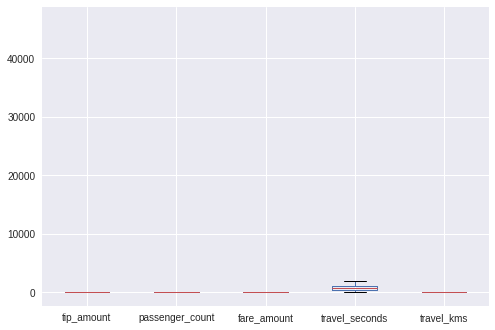

In [0]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef1da46978>,
      dtype=object)

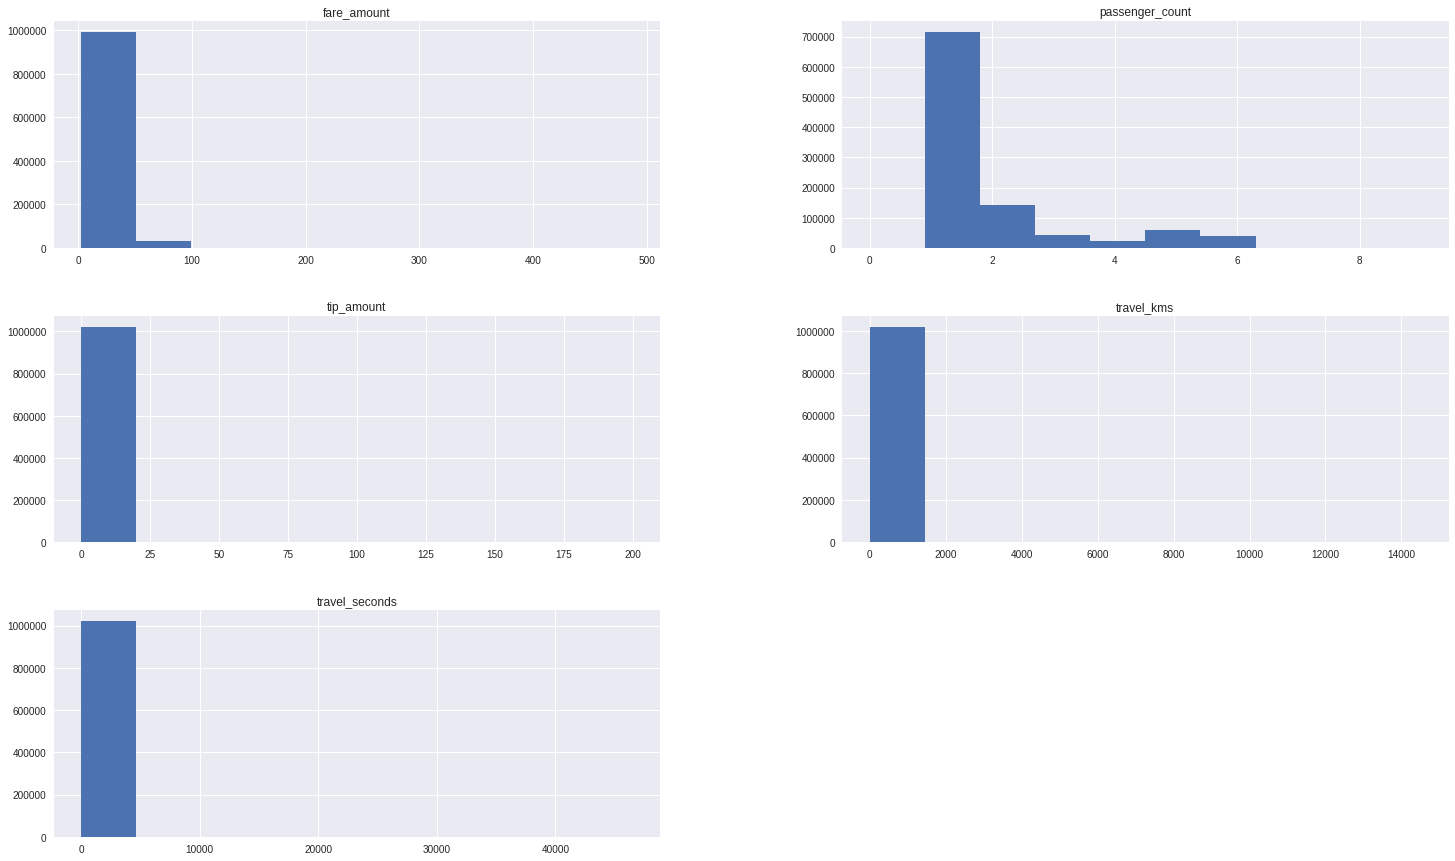

In [0]:
data.hist(figsize=(25,15))

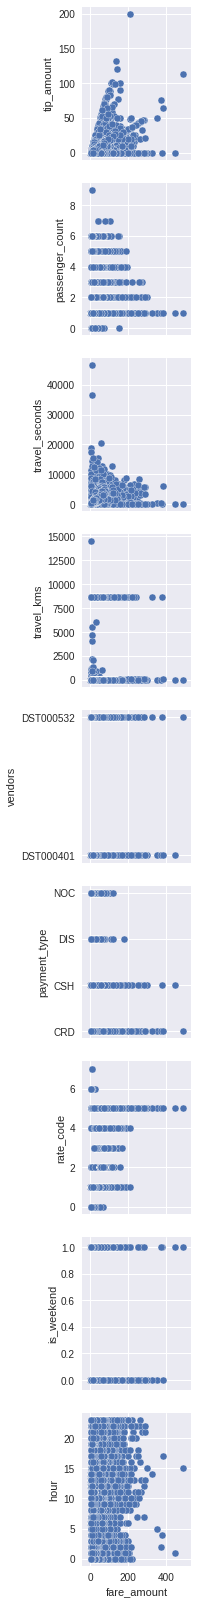

In [0]:
sns.pairplot(data=data,y_vars=['tip_amount','passenger_count','travel_seconds','travel_kms','vendors','payment_type','rate_code','is_weekend','hour'],x_vars=['fare_amount'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


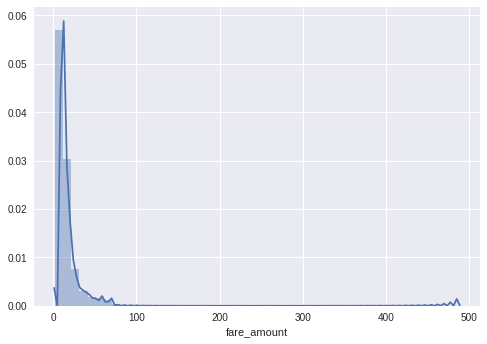

In [0]:
sns.distplot(data['fare_amount'])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022737 entries, 0 to 1048574
Data columns (total 10 columns):
tip_amount         1022737 non-null float64
passenger_count    1022737 non-null int64
fare_amount        1022737 non-null float64
travel_seconds     1022737 non-null float64
travel_kms         1022737 non-null float64
vendors            1022737 non-null category
payment_type       1022737 non-null category
rate_code          1022737 non-null category
hour               1022737 non-null category
is_weekend         1022737 non-null category
dtypes: category(5), float64(4), int64(1)
memory usage: 91.7 MB


In [0]:
dict_vendors={}
count=0
for i in data['vendors'].unique():
    dict_vendors[count]=i
    count+=1
dict_vendors

{0: 'DST000401', 1: 'DST000532'}

In [0]:
data['vendors']=data['vendors'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
data.head()

,tip_amount,passenger_count,fare_amount,travel_seconds,travel_kms,vendors,payment_type,rate_code,hour,is_weekend
0,1.4,1,8.4,360.0,1.311173,0,CRD,1,4,0
1,1.0,3,8.5,360.0,2.596270,0,CRD,1,18,1
2,0.0,2,7.0,360.0,1.538152,0,CSH,1,8,0
3,1.8,2,11.3,720.0,1.598931,1,CRD,1,9,0
4,0.0,1,10.0,840.0,1.626473,0,CSH,1,13,0


In [0]:
en_data=pd.merge(data,pd.get_dummies(data[['payment_type','rate_code','hour']],columns=['payment_type','rate_code','hour']), left_index=True, right_index=True)
en_data=en_data.drop(['rate_code','payment_type','hour'],axis=1)
en_data.head()

,tip_amount,passenger_count,fare_amount,travel_seconds,travel_kms,vendors,is_weekend,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,rate_code_0,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,rate_code_7,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1.4,1,8.4,360.0,1.311173,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,3,8.5,360.0,2.596270,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,2,7.0,360.0,1.538152,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.8,2,11.3,720.0,1.598931,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1,10.0,840.0,1.626473,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
X = en_data.drop(['fare_amount'],axis=1)
y = en_data['fare_amount']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print('intercept: ',mymodel.intercept_)
print(list(zip(X.columns,mymodel.coef_)))

intercept:  21.08668393763914
[('tip_amount', 1.7129452243669472), ('passenger_count', 0.0077474667332938195), ('travel_seconds', 0.011823879300261006), ('travel_kms', 0.0002914235309243599), ('vendors', 0.17804954456503358), ('is_weekend', -0.25378569908255155), ('payment_type_CRD', -0.27029121569207776), ('payment_type_CSH', 0.6389636440405996), ('payment_type_DIS', 0.1877768957054609), ('payment_type_NOC', -0.5564493241437708), ('rate_code_0', -16.93464387246208), ('rate_code_1', -17.966131937556167), ('rate_code_2', 2.127976160453978), ('rate_code_3', 25.5904885826853), ('rate_code_4', 15.849730655002885), ('rate_code_5', 32.775332723732866), ('rate_code_6', -21.450338039753614), ('rate_code_7', -19.99241427208361), ('hour_0', 0.939588163228214), ('hour_1', 1.0796574699054273), ('hour_2', 1.3419644569533515), ('hour_3', 1.754390032712509), ('hour_4', 2.654770164145305), ('hour_5', 3.296092004117986), ('hour_6', 1.0315066753811963), ('hour_7', -0.36529867715175846), ('hour_8', -1.21

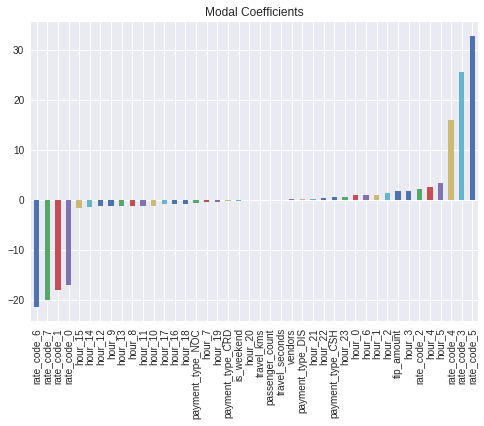

In [0]:
coef = pd.Series(mymodel.coef_,X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

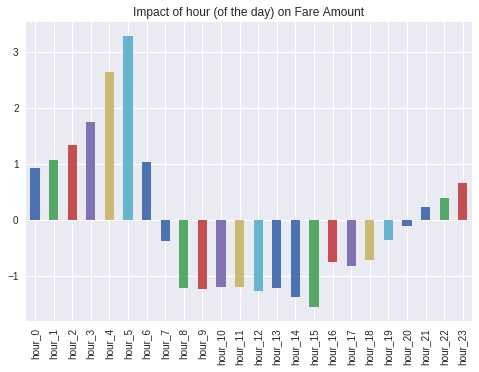

In [0]:
hour_coef = pd.Series(mymodel.coef_[-24:],X_train.columns[-24:])
hour_coef.plot(kind='bar', title='Impact of hour (of the day) on Fare Amount')

In [0]:
y_pred = mymodel.predict(X_test)
actvspred=pd.DataFrame(data={'actual':y_test,'predicted':y_pred})
actvspred

,actual,predicted
161883,24.60,30.439042
589731,9.00,8.772822
862092,13.75,16.976197
648125,10.50,10.787183
442830,13.00,12.511663
1032371,12.60,15.903372
178043,7.50,8.887064
40317,10.00,11.091718
380010,14.00,14.997617
474489,10.70,12.256733


In [0]:
import statsmodels.formula.api as sm

In [0]:
model1 = sm.ols(formula='fare_amount ~ tip_amount+ passenger_count+ travel_seconds+ travel_kms+vendors+ payment_type_CRD+payment_type_CSH+ payment_type_DIS+ payment_type_NOC+rate_code_0+ rate_code_1+ rate_code_2+ rate_code_3+rate_code_4+ rate_code_5+ rate_code_6+ rate_code_7+hour_0+ hour_1+ hour_2+ hour_3+ hour_4+hour_5+ hour_6+ hour_7+ hour_8+ hour_9+ hour_10+ hour_11+hour_12+ hour_13+ hour_14+ hour_15+ hour_16+ hour_17+hour_18+ hour_19+ hour_20+ hour_21+ hour_22+ hour_23+is_weekend', data=en_data)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 1.453e+05
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:53:12   Log-Likelihood:            -3.0698e+06
No. Observations:             1022737   AIC:                         6.140e+06
Df Residuals:                 1022697   BIC:                         6.140e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.9064      0.341     43.758      0.000      14.239      15.574
is_weekend[T.1]     -0.2472      0.010    -23.799      0.000      -0.268      -0.227
tip_amount           1.7219      0.003    595.303      0.000       1.716       1.728
passenger_count      0.0045      0.004      1.233      0.218      -0.003       0.012
travel_seconds       0.0119   9.41e-06   1262.763      0.000       0.012       0.012
travel_kms           0.0003   9.59e-06     30.703      0.000       0.000       0.000
vendors              0.1739      0.010     17.158      0.000       0.154       0.194
payment_type_CRD     3.4071      0.095     35.779      0.000       3.220       3.594
payment_type_CSH     4.3407      0.095     45.659      0.000       4.154       4.527
payment_type_DIS     3.9175      0.166     23.550      0.000       3.591       4.244
payment_type_NOC     3.2412      0.122     26.579      0.000       3.002       3.480
rate_code_0        -14.6512      0.828    -17.689      0.000     -16.275     -13.028
rate_code_1        -16.1438      0.438    -36.881      0.000     -17.002     -15.286
rate_code_2          3.7780      0.439      8.608      0.000       2.918       4.638
rate_code_3         27.3620      0.451     60.715      0.000      26.479      28.245
rate_code_4         17.6044      0.496     35.482      0.000      16.632      18.577
rate_code_5         34.8659      0.448     77.875      0.000      33.988      35.743
rate_code_6        -19.7518      1.362    -14.502      0.000     -22.421     -17.082
rate_code_7        -18.1570      3.056     -5.941      0.000     -24.147     -12.167
hour_0               1.5546      0.028     55.939      0.000       1.500       1.609
hour_1               1.7157      0.031     55.058      0.000       1.655       1.777
hour_2               1.9851      0.035     56.575      0.000       1.916       2.054
hour_3               2.3691      0.040     58.757      0.000       2.290       2.448
hour_4               3.2948      0.045     72.608      0.000       3.206       3.384
hour_5               3.8753      0.048     81.083      0.000       3.782       3.969
hour_6               1.6594      0.035     47.687      0.000       1.591       1.728
hour_7               0.2785      0.029      9.758      0.000       0.223       0.334
hour_8              -0.6108      0.027    -22.946      0.000      -0.663      -0.559
hour_9              -0.6376      0.026    -24.169      0.000      -0.689      -0.586
hour_10             -0.5675      0.027    -21.329      0.000      -0.620      -0.515
hour_11             -0.5747      0.026    -21.906      0.000      -0.626      -0.523
hour_12             -0.6605      0.026    -25.558      0.000      -0.711      -0.610
hour_13             -0.5936      0.026    -22.876      0.000      -0.644      -0.543
hour_14             -0.

In [0]:
fitted1.params

Intercept           14.906429
is_weekend[T.1]     -0.247151
tip_amount           1.721869
passenger_count      0.004502
travel_seconds       0.011879
travel_kms           0.000294
vendors              0.173938
payment_type_CRD     3.407051
payment_type_CSH     4.340676
payment_type_DIS     3.917499
payment_type_NOC     3.241203
rate_code_0        -14.651207
rate_code_1        -16.143845
rate_code_2          3.777963
rate_code_3         27.361996
rate_code_4         17.604424
rate_code_5         34.865875
rate_code_6        -19.751808
rate_code_7        -18.156970
hour_0               1.554615
hour_1               1.715662
hour_2               1.985119
hour_3               2.369083
hour_4               3.294756
hour_5               3.875275
hour_6               1.659390
hour_7               0.278456
hour_8              -0.610778
hour_9              -0.637590
hour_10             -0.567454
hour_11             -0.574707
hour_12             -0.660471
hour_13             -0.593586
hour_14   

In [0]:
from sklearn import metrics

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.413559138401165
Mean Squared Error: 22.31114113669594
Root Mean Squared Error: 4.723467067387677


In [0]:
print('Coefficient of Determination:',mymodel.score(X_test, y_test))

Coefficient of Determination: 0.8545537453821099


In [0]:
import matplotlib.pyplot as plt

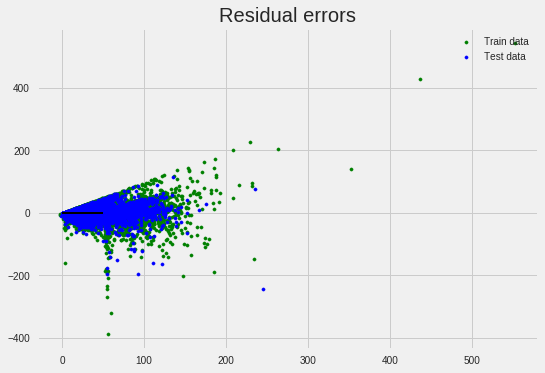

In [0]:
plt.style.use('fivethirtyeight') 
plt.scatter(mymodel.predict(X_train), mymodel.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
plt.scatter(mymodel.predict(X_test), mymodel.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show()

In [0]:
from sklearn.model_selection import cross_val_predict

<Figure size 14400x7200 with 0 Axes>

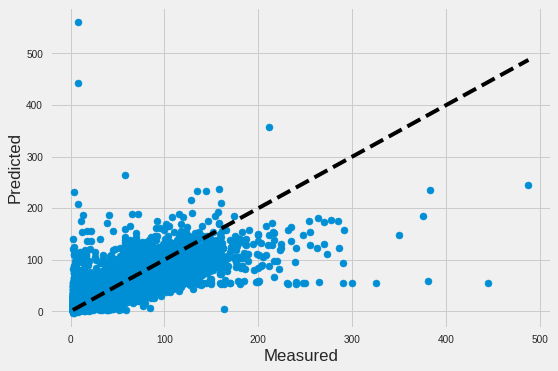

In [0]:
predicted = cross_val_predict(mymodel, X, y, cv=10)
plt.figure(figsize=(200,100))
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
from sklearn.linear_model import Ridge

In [0]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
clf.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [0]:
y_pred=clf.predict(X_test)

In [0]:
clf.score(X_test, y_test)

0.8545529934318341

In [0]:
list(zip(X.columns,clf.coef_))

[('tip_amount', 1.7130584287389414),
 ('passenger_count', 0.007738177441613543),
 ('travel_seconds', 0.011824014792850716),
 ('travel_kms', 0.00029157528178036936),
 ('vendors', 0.17816965569907373),
 ('is_weekend', -0.25377255792811043),
 ('payment_type_CRD', -0.26960015183350083),
 ('payment_type_CSH', 0.6397944552705322),
 ('payment_type_DIS', 0.18892152963561745),
 ('payment_type_NOC', -0.5591158318582012),
 ('rate_code_0', -17.574652733314498),
 ('rate_code_1', -19.234002322515984),
 ('rate_code_2', 0.8592908624036484),
 ('rate_code_3', 24.302845375387072),
 ('rate_code_4', 14.524725831455164),
 ('rate_code_5', 31.487831357008663),
 ('rate_code_6', -20.192789188405545),
 ('rate_code_7', -14.173249183255733),
 ('hour_0', 0.939444175838723),
 ('hour_1', 1.0797327232160845),
 ('hour_2', 1.3419819865061835),
 ('hour_3', 1.7544357299538822),
 ('hour_4', 2.6547463775800275),
 ('hour_5', 3.295646519368134),
 ('hour_6', 1.031091189354434),
 ('hour_7', -0.3652602402523181),
 ('hour_8', -1.

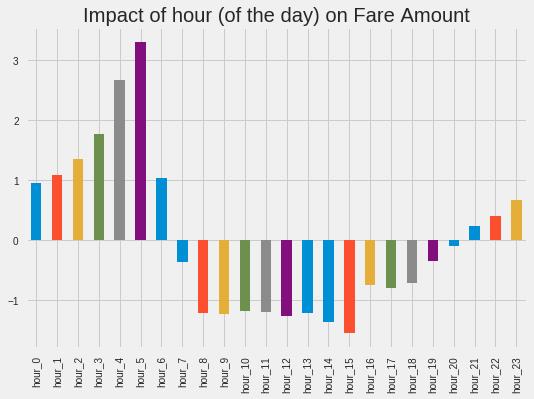

In [0]:
ridge_hour_coef = pd.Series(clf.coef_[-24:],X_train.columns[-24:])
ridge_hour_coef.plot(kind='bar', title='Impact of hour (of the day) on Fare Amount')